## Test

### Q1 Show how you would import a couple of key python packages

In [2]:
import pandas as pd
from datetime import datetime
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data)

df_ages = pd.DataFrame({
        'Name': ['Alex', 'Blake', 'Charlie', 'Dylan', 'Eli', 'Femi'],
        'Age': [7,8,9, 8, 7, 6],
        'Last Name': ['Apple', 'Baker', 'Chaplin', 'Dreams', 'Elephant', 'Baker'],
        'Group': ['Ghosts', 'Pumpkins', 'Pumpkins', 'Pumpkins', 'Ghosts', 'Ghosts']
    })

### Q2 Show how to display the first 5 rows of a dataframe called my_df
You can display more or fewer rows by specifying a number. Also check out the .tail() and .sample() methods.

In [12]:
df_ages.head()

,Names,Age
0,Alex,7
1,Blake,8
2,Charlie,9


### Q3 What kind of information does my_df.info() return?

Compare this with the .describe() method.

In [13]:
#Q3
df_ages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   3 non-null      object
 1   Age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


### Q4 Show two different ways of how to retrieve the column called “age” from my_df

Comment on cases where I can only use one of these options.

The first option only works with column names that do not contain spaces or special characters. Try it out! What does the ```\n``` do?

In [22]:
ages_1 = df_ages.Age
ages_2 = df_ages['Age']
ages_3 = df_ages.loc[:,'Age']

print(ages_1, '\n', ages_2, '\n', ages_3)

0    7
1    8
2    9
Name: Age, dtype: int64 
 0    7
1    8
2    9
Name: Age, dtype: int64 
 0    7
1    8
2    9
Name: Age, dtype: int64


### Q5 Show how to return only the rows of the data frame where the age value is unequal to 7
Try both options. What is the additional benefit of using .loc?

In [25]:
df_ages[df_ages['Age']!=7]
df_ages.loc[df_ages['Age']!=7]
df_ages.loc[df_ages['Age'] != 7, ['Name', 'Age']]

,Name,Age
1,Blake,8
2,Charlie,9


Why does this not work: ```df_ages["age" !=7]```

### Q6 Matplotlib

As what (acronym) do we usually import pyplot from matplotlib and what line of code ensures that a given plot is actually rendered?

Is the .show() method necessary here?

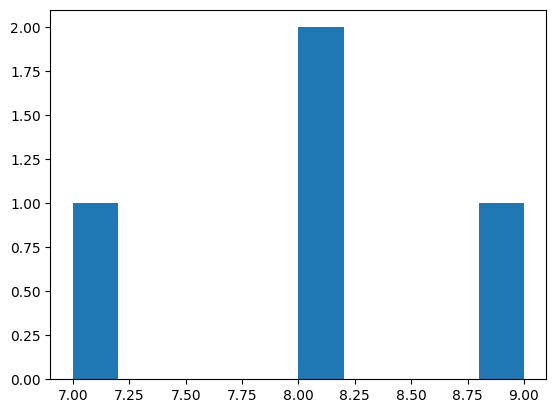

In [32]:
from matplotlib import pyplot as plt

plt.hist(df_ages['Age'])
plt.show()

### Q7 What are the values that will be printed when running this while loop
How would you need to change the loop such that 10 does not get printed? Would fewer values be printed?

In [35]:
x = 10
while x > 0:
    print(x)
    x = x - 3

10
7
4
1


### Q8 Give one or more examples of iterables in Python
i.e. objects that can be iterated over in a for-loop, and give a simple example of a for loop over any iterable (both the code and the expected output).

Which part of this code is completely arbitray?

In [37]:
my_list = ['A', 'B', 'C']
for i in my_list:
    print(i)

A
B
C


### Q9 Show how to return just the second element of this list:  my_list = [‘A’, ‘B’, ‘C’]

Why does 1 return the 2nd element and not the first?

In [39]:
my_list[1]

'B'

### Q10  Show how to build a dictionary in Python
Label the two types of items that dictionaries contain.

Which are the keys are which are the values?

In [42]:
my_dict = {
    'start': [3,4,5],
    'end': [10, 10, 10]
}
my_dict

{'start': [3, 4, 5], 'end': [10, 10, 10]}

### Q11 Generate an additional column called “sum” that row-wise adds the values from the other two columns

Which option do you like best?

In [48]:
df_sum = pd.DataFrame(my_dict)

df_sum['sum'] = df_sum['end'] + df_sum['start']
df_sum


,start,end,sum
0,3,10,13
1,4,10,14
2,5,10,15


In [51]:
df_sum = df_sum.assign(sum_2=df_sum['end'] + df_sum['start'])

df_sum.eval("sum_3 = end + start", inplace=True)

df_sum['sum_4'] = df_sum.apply(lambda row: row['end'] + row['start'], axis=1)

def add_sum_column(df):
    df['sum_5'] = df['end'] + df['start']
    return df

df_sum = df_sum.pipe(add_sum_column)

### Q12 Show how to use the index() method on a list of your choice and show the expected output

Why might this be useful?

In [53]:
my_list.index('C')

2

### Q13 Give an example of a method and an attribute of a pandas dataframe

In [59]:
print(df_ages.size)
print(df_ages.columns)
df_ages.T

20
Index(['Name', 'Age', 'Last Name', 'Group'], dtype='object')


,0,1,2,3,4
Name,Alex,Blake,Charlie,Dylan,Eli
Age,7,8,9,8,7
Last Name,Apple,Baker,Chaplin,Dreams,Elephant
Group,Ghosts,Pumpkins,Pumpkins,Pumpkins,Ghosts


In [64]:
df_new = df_ages.copy()

df_new.groupby('Group').agg({
    'Age': 'mean',
    'Name': 'count',
    'Last Name': 'nunique'
}
)

,Age,Name,Last Name
Group,,,
Ghosts,6.666667,3,3
Pumpkins,8.333333,3,3


### Q14 What would df.loc[1, 'Age'] return for this dataframe?

In [65]:
df_ages.loc[1,'Age']

np.int64(8)